# **4 ] Experiments**

# 4.1] Dataset Creation

Installing all the necessary librariies

In [ ]:
pip install text-preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 13.1 MB/s eta 0:00:00


In [ ]:
from text_preprocessing import preprocess_text
from text_preprocessing import to_lower, remove_email, remove_url, remove_punctuation, lemmatize_word

# Preprocess text using default preprocess functions in the pipeline 
text_to_process = 'Helllo, I am John Doe!!! My email is john.doe@email.com. Visit our website www.johndoe.com'
preprocessed_text = preprocess_text(text_to_process)
print(preprocessed_text)
# output: hello email visit website

# Preprocess text using custom preprocess functions in the pipeline 
preprocess_functions = [to_lower, remove_email, remove_url, remove_punctuation, lemmatize_word]
preprocessed_text = preprocess_text(text_to_process, preprocess_functions)
print(preprocessed_text)
# output: helllo i am john doe my email is visit our website

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


hello email visit website
helllo i am john doe my email is visit our website


In [ ]:
import pandas as pd       
from nltk.tokenize import TweetTokenizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.util import  mark_negation
from nltk.corpus import opinion_lexicon

from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, cohen_kappa_score, classification_report
import numpy as np

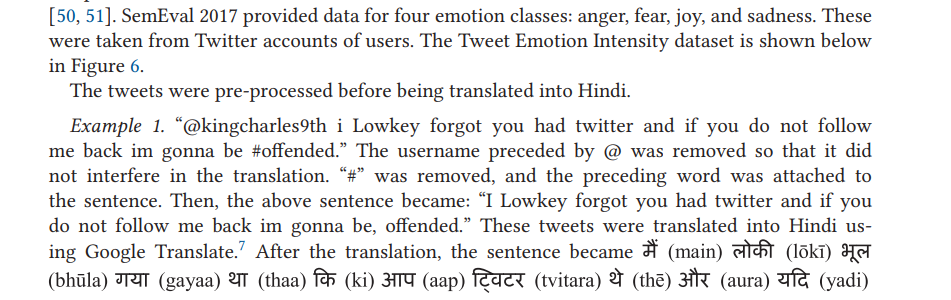

Link for the dataset semeval 2017

https://paperswithcode.com/paper/emotion-intensities-in-tweets

In [ ]:
train_data = pd.read_csv("/content/twitter-train-B.txt", header=None, delimiter="\t",usecols=(2,3), names=("sent","tweet"))
test_data = pd.read_csv("/content/twitter-test-gold-B.tsv", header=None, delimiter="\t",usecols=(2,3), names=("sent","tweet"))


train_data.sent = train_data.sent.replace(['objective-OR-neutral','objective'],['neutral','neutral'])


tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True)

In [ ]:
full=pd.concat([test_data,train_data])
full

,sent,tweet
0,positive,@jjuueellzz down in the Atlantic city\u002c ve...
1,positive,Musical awareness: Great Big Beautiful Tomorro...
2,neutral,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...
3,negative,Kapan sih lo ngebuktiin\u002cjan ngomong doang...
4,neutral,Tomorrow come and hear @DavidWillettsMP&@MASie...
...,...,...
9679,positive,RT @MNFootNg It's monday and Monday Night Foot...
9680,positive,All I know is the road for that Lomardi start ...
9681,neutral,"All Blue and White fam, we r meeting at Golden..."
9682,positive,@DariusButler28 Have a great game agaist Tam...


Data Preprocessing involves following steps The various steps used for this are given below.
1. Removal of special characters, such as “*,” “!,” and “.”
2. Removal of repeated characters.
3. Removal of some irrelevant sentences.

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [ ]:
import re
full['clean_tweet'] = np.vectorize(remove_pattern)(full['tweet'], "@[\w]*")

In [ ]:
full['clean_tweet'] = full['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
full.head()

<ipython-input-10-93258bb97347>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  full['clean_tweet'] = full['clean_tweet'].str.replace("[^a-zA-Z#]", " ")


,sent,tweet,clean_tweet
0,positive,@jjuueellzz down in the Atlantic city\u002c ve...,down in the Atlantic city u c ventnor u c...
1,positive,Musical awareness: Great Big Beautiful Tomorro...,Musical awareness Great Big Beautiful Tomorro...
2,neutral,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...,On Radio fm Fri Oct Labour ana...
3,negative,Kapan sih lo ngebuktiin\u002cjan ngomong doang...,Kapan sih lo ngebuktiin u cjan ngomong doang...
4,neutral,Tomorrow come and hear @DavidWillettsMP&@MASie...,Tomorrow come and hear debate Navigating ...


In [ ]:
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuations(text):
    punctuations = string.punctuation
    return text.translate(str.maketrans('', '', punctuations))

In [ ]:
from collections import Counter
word_count = Counter()
for text in full['clean_tweet']:
    for word in text.split():
        word_count[word] += 1
        
word_count.most_common(10)

[('u', 12076),
 ('the', 10422),
 ('to', 6307),
 ('c', 6019),
 ('t', 4378),
 ('I', 4375),
 ('in', 4101),
 ('on', 4003),
 ('a', 3345),
 ('and', 3331)]

In [ ]:
FREQUENT_WORDS = set(word for (word, wc) in word_count.most_common(3))
def remove_freq_words(text):
    return " ".join([word for word in text.split() if word not in FREQUENT_WORDS ])

In [ ]:
full['clean_tweet'] = full['clean_tweet'].apply(lambda x: remove_freq_words(x))
full.head()

,sent,tweet,clean_tweet
0,positive,@jjuueellzz down in the Atlantic city\u002c ve...,down in Atlantic city c ventnor c margate c oc...
1,positive,Musical awareness: Great Big Beautiful Tomorro...,Musical awareness Great Big Beautiful Tomorrow...
2,neutral,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...,On Radio fm Fri Oct Labour analyst Shawn Hatti...
3,negative,Kapan sih lo ngebuktiin\u002cjan ngomong doang...,Kapan sih lo ngebuktiin cjan ngomong doang Sus...
4,neutral,Tomorrow come and hear @DavidWillettsMP&@MASie...,Tomorrow come and hear debate Navigating new H...


In [ ]:
RARE_WORDS = set(word for (word, wc) in word_count.most_common()[:-10:-1])
RARE_WORDS

{'#MNFootNg',
 'Alburquerque',
 'Corral',
 'Lomardi',
 'Martinez',
 'lolla',
 'pisseeedddd',
 'tba',
 'thx'}

In [ ]:
def remove_rare_words(text):
    return " ".join([word for word in text.split() if word not in RARE_WORDS ])

In [ ]:
full['clean_tweet'] = full['clean_tweet'].apply(lambda x: remove_rare_words(x))
full.head()

,sent,tweet,clean_tweet
0,positive,@jjuueellzz down in the Atlantic city\u002c ve...,down in Atlantic city c ventnor c margate c oc...
1,positive,Musical awareness: Great Big Beautiful Tomorro...,Musical awareness Great Big Beautiful Tomorrow...
2,neutral,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...,On Radio fm Fri Oct Labour analyst Shawn Hatti...
3,negative,Kapan sih lo ngebuktiin\u002cjan ngomong doang...,Kapan sih lo ngebuktiin cjan ngomong doang Sus...
4,neutral,Tomorrow come and hear @DavidWillettsMP&@MASie...,Tomorrow come and hear debate Navigating new H...


In [ ]:
import re
def remove_spl_chars(text):
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text

In [ ]:
full['clean_tweet'] = full['clean_tweet'].apply(lambda x: remove_spl_chars(x))
full.head()

,sent,tweet,clean_tweet
0,positive,@jjuueellzz down in the Atlantic city\u002c ve...,down in Atlantic city c ventnor c margate c oc...
1,positive,Musical awareness: Great Big Beautiful Tomorro...,Musical awareness Great Big Beautiful Tomorrow...
2,neutral,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...,On Radio fm Fri Oct Labour analyst Shawn Hatti...
3,negative,Kapan sih lo ngebuktiin\u002cjan ngomong doang...,Kapan sih lo ngebuktiin cjan ngomong doang Sus...
4,neutral,Tomorrow come and hear @DavidWillettsMP&@MASie...,Tomorrow come and hear debate Navigating new H...


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

punkt is the required package for tokenization,it can be downloaded  using nltk download manager or download it programmatically using nltk.download('punkt')

NLTK provides two methods: nltk.word_tokenize() to divide given text at word level and nltk.sent_tokenize() to divide given text at sentence level.
Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning

In [ ]:
from nltk.tokenize import word_tokenize

def get_tokens(row):
    return word_tokenize(row["clean_tweet"].lower())

full["tokens"] = full.apply(lambda row: get_tokens(row), axis = 1)
full.sample(5, random_state = 4)

,sent,tweet,clean_tweet,tokens
5446,neutral,Galaxy tune up for Whitecaps\u002c Sounders fa...,Galaxy tune up for Whitecaps c Sounders fall r...,"[galaxy, tune, up, for, whitecaps, c, sounders..."
3632,neutral,We will be closed this Monday\u002c February 2...,We will be closed this Monday c February th fo...,"[we, will, be, closed, this, monday, c, februa..."
5256,neutral,MVP - Chris Paul 6th Man - Jason Terry Defensi...,MVP Chris Paul th Man Jason Terry Defensive Pl...,"[mvp, chris, paul, th, man, jason, terry, defe..."
8252,neutral,Tennessee game Saturday with @King_Gunter :),Tennessee game Saturday with,"[tennessee, game, saturday, with]"
1572,negative,This girl said The Challenge has been filled o...,This girl said The Challenge has been filled o...,"[this, girl, said, the, challenge, has, been, ..."


4.2 Data Preparation

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

Pos Tagging - It is a process of converting a sentence to forms – list of words, list of tuples (where each tuple is having a form (word, tag)). The tag in case of is a part-of-speech tag, and signifies whether the word is a noun, adjective, verb, and so on

In [ ]:
def get_postags(row):
    
    postags = nltk.pos_tag(row["tokens"])
    list_classes = list()
    for  word in postags:
        list_classes.append(word[1])
    
    return list_classes

full["postags"] = full.apply(lambda row: get_postags(row), axis = 1)
full.sample(5, random_state = 4)

,sent,tweet,clean_tweet,tokens,postags
5446,neutral,Galaxy tune up for Whitecaps\u002c Sounders fa...,Galaxy tune up for Whitecaps c Sounders fall r...,"[galaxy, tune, up, for, whitecaps, c, sounders...","[NN, VBZ, RP, IN, NNS, JJ, NNS, VBP, NN, NN, N..."
3632,neutral,We will be closed this Monday\u002c February 2...,We will be closed this Monday c February th fo...,"[we, will, be, closed, this, monday, c, februa...","[PRP, MD, VB, VBN, DT, NN, VBZ, JJ, NN, IN, NN..."
5256,neutral,MVP - Chris Paul 6th Man - Jason Terry Defensi...,MVP Chris Paul th Man Jason Terry Defensive Pl...,"[mvp, chris, paul, th, man, jason, terry, defe...","[NN, NN, NN, NN, NN, NN, NN, JJ, NN, NN, VBZ, ..."
8252,neutral,Tennessee game Saturday with @King_Gunter :),Tennessee game Saturday with,"[tennessee, game, saturday, with]","[NN, NN, NN, IN]"
1572,negative,This girl said The Challenge has been filled o...,This girl said The Challenge has been filled o...,"[this, girl, said, the, challenge, has, been, ...","[DT, NN, VBD, DT, NN, VBZ, VBN, VBN, IN, NNS, ..."


In [ ]:
def get_at(row):
    return re.findall("@[\w]+", row["tweet"])

def get_http(row):
    return re.findall("http[\:\/\.\w]+", row["tweet"])

def get_hashtags(row):
    return re.findall("#[\w]+", row["tweet"])

def number_of_tags(row):
    return len(row["tags"])

def number_of_links(row):
    return len(row["links"])

def number_of_hashs(row):
    return len(row["hashtags"])

def clean_text(row):
    clean = row["tweet"]
    
    if len(row["tags"]) != 0:
        for word in row["tags"]:
            clean = clean.replace(word, "")
    
    if len(row["links"]) != 0:
        for word in row["links"]:
            clean = clean.replace(word, "")
    
    #only remove the # symbol
    clean = clean.replace("#", "").replace("/", "").replace("(", "").replace(")", "")
    
    return clean.strip()

full["tags"] = full.apply(lambda row: get_at(row), axis = 1)
full["links"] = full.apply(lambda row: get_http(row), axis = 1)
full["hashtags"] = full.apply(lambda row: get_hashtags(row), axis = 1)

full["number_of_tags"] = full.apply(lambda row: number_of_tags(row), axis = 1)
full["number_of_links"] = full.apply(lambda row: number_of_links(row), axis = 1)
full["number_of_hashs"] = full.apply(lambda row: number_of_hashs(row), axis = 1)

full["clean_text"] = full.apply(lambda row: clean_text(row), axis = 1)
full.sample(5)

,sent,tweet,clean_tweet,tokens,postags,freqAdverbs,freqVerbs,freqAdjectives,freqNouns,tags,links,hashtags,number_of_tags,number_of_links,number_of_hashs,clean_text
4473,positive,Ah yes\u002c sexy Saturday in the Turner house...,Ah yes c sexy Saturday in Turner house http t ...,"[ah, yes, c, sexy, saturday, in, turner, house...","[JJ, NNS, VBP, JJ, NN, IN, NN, NN, NN, NN, NN,...",0.00,0.076923,0.153846,0.692308,[],[http://t.co/yVZsH8Vo],[],0,1,0,Ah yes\u002c sexy Saturday in the Turner house...
714,positive,going to finish watching The Vow tomorrow \u00...,going finish watching The Vow tomorrow c its s...,"[going, finish, watching, the, vow, tomorrow, ...","[VBG, JJ, VBG, DT, NN, NN, VB, PRP$, JJ, DT, J...",0.00,0.230769,0.230769,0.307692,[],[],[],0,0,0,going to finish watching The Vow tomorrow \u00...
8461,neutral,@rioferdy5 Harold and the Purple Crayon\u002c ...,Harold and Purple Crayon c although it may be ...,"[harold, and, purple, crayon, c, although, it,...","[NN, CC, JJ, NN, NN, IN, PRP, MD, VB, IN, RB, ...",0.10,0.100000,0.100000,0.350000,[@rioferdy5],[],[],1,0,0,Harold and the Purple Crayon\u002c although it...
1816,negative,#fakta on the 8th of Mar 191 Cao Cao attempted...,fakta on th of Mar Cao Cao attempted an assas...,"[fakta, on, th, of, mar, cao, cao, attempted, ...","[NN, IN, NN, IN, NN, NN, NN, VBD, DT, NN, IN, ...",0.00,0.040000,0.120000,0.480000,[],[],[#fakta],0,0,1,fakta on the 8th of Mar 191 Cao Cao attempted ...
170,positive,The Grey and Yellow Gold Wedding Puzzle is now...,The Grey and Yellow Gold Wedding Puzzle is now...,"[the, grey, and, yellow, gold, wedding, puzzle...","[DT, NN, CC, JJ, NN, NN, NN, VBZ, RB, RB, IN, ...",0.08,0.080000,0.120000,0.480000,[@shopbop],[http://t.co/1RYso3ZZ],[],1,1,0,The Grey and Yellow Gold Wedding Puzzle is now...


In [ ]:
def get_postags(row):
    
    postags = nltk.pos_tag(row["tokens"])
    list_classes = list()
    for  word in postags:
        list_classes.append(word[1])
    
    return list_classes

full["postags"] = full.apply(lambda row: get_postags(row), axis = 1)
full.sample(5, random_state = 4)

,sent,tweet,clean_tweet,tokens,postags,freqAdverbs,freqVerbs,freqAdjectives,freqNouns,tags,links,hashtags,number_of_tags,number_of_links,number_of_hashs,clean_text
5446,neutral,Galaxy tune up for Whitecaps\u002c Sounders fa...,Galaxy tune up for Whitecaps c Sounders fall r...,"[galaxy, tune, up, for, whitecaps, c, sounders...","[NN, VBZ, RP, IN, NNS, JJ, NNS, VBP, NN, NN, N...",0.000000,0.115385,0.038462,0.615385,[],[http://t.co/1JL6kiWR],[],0,1,0,Galaxy tune up for Whitecaps\u002c Sounders fa...
3632,neutral,We will be closed this Monday\u002c February 2...,We will be closed this Monday c February th fo...,"[we, will, be, closed, this, monday, c, februa...","[PRP, MD, VB, VBN, DT, NN, VBZ, JJ, NN, IN, NN...",0.000000,0.217391,0.043478,0.391304,[],[http://t.co/vyTBFiH4],[],0,1,0,We will be closed this Monday\u002c February 2...
5256,neutral,MVP - Chris Paul 6th Man - Jason Terry Defensi...,MVP Chris Paul th Man Jason Terry Defensive Pl...,"[mvp, chris, paul, th, man, jason, terry, defe...","[NN, NN, NN, NN, NN, NN, NN, JJ, NN, NN, VBZ, ...",0.050000,0.050000,0.100000,0.750000,[],[],[],0,0,0,MVP - Chris Paul 6th Man - Jason Terry Defensi...
8252,neutral,Tennessee game Saturday with @King_Gunter :),Tennessee game Saturday with,"[tennessee, game, saturday, with]","[NN, NN, NN, IN]",0.000000,0.000000,0.000000,0.750000,[@King_Gunter],[],[],1,0,0,Tennessee game Saturday with :
1572,negative,This girl said The Challenge has been filled o...,This girl said The Challenge has been filled o...,"[this, girl, said, the, challenge, has, been, ...","[DT, NN, VBD, DT, NN, VBZ, VBN, VBN, IN, NNS, ...",0.045455,0.363636,0.045455,0.318182,[],[],[],0,0,0,This girl said The Challenge has been filled o...


In [ ]:
# Importing the required libraries
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
# Function to extract the proper nouns 

def ProperNounExtractor(text):
    
    print('PROPER NOUNS EXTRACTED :')
    
    sentences = nltk.sent_tokenize(text)
    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        words = [word for word in words if word not in set(stopwords.words('english'))]
        tagged = nltk.pos_tag(words)
        for (word, tag) in tagged:
            if tag == 'NNP': # If the word is a proper noun
                print(word)

In [ ]:
def find_no_class(count, class_name = ""):
    total = 0
    for key in count.keys():
        if key.startswith(class_name):
            total += count[key]
            
            
    return total

def get_classes(row, grammatical_class = ""):
    count = Counter(row["postags"])
    return find_no_class(count, class_name = grammatical_class)/len(row["postags"])

full["freqAdverbs"] = full.apply(lambda row: get_classes(row, "RB"), axis = 1)
full["freqVerbs"] = full.apply(lambda row: get_classes(row, "VB"), axis = 1)
full["freqAdjectives"] = full.apply(lambda row: get_classes(row, "JJ"), axis = 1)
full["freqNouns"] = full.apply(lambda row: get_classes(row, "NN"), axis = 1)

full.sample(5)

,sent,tweet,clean_tweet,tokens,postags,freqAdverbs,freqVerbs,freqAdjectives,freqNouns
6352,neutral,RT @iGotBitchesYeah: Drenched in vanilla twili...,RT Drenched in vanilla twilight i ll sit on fr...,"[rt, drenched, in, vanilla, twilight, i, ll, s...","[NN, VBN, IN, NN, NN, NN, VBP, NN, IN, NN, NN,...",0.000000,0.136364,0.045455,0.500000
8903,neutral,Front Line with Kamran Shahid ANP Shahi Syed h...,Front Line with Kamran Shahid ANP Shahi Syed h...,"[front, line, with, kamran, shahid, anp, shahi...","[JJ, NN, IN, NN, NN, NN, NN, VBD, JJ, NN, NN, ...",0.000000,0.071429,0.142857,0.714286
6998,neutral,Bolton Society for Blind People are bringing V...,Bolton Society for Blind People are bringing V...,"[bolton, society, for, blind, people, are, bri...","[NN, NN, IN, NN, NNS, VBP, VBG, IN, NN, IN, DT...",0.000000,0.130435,0.000000,0.652174
598,neutral,Wasn\u2019t there an International Women\u2019...,Wasn t there an International Women s day on t...,"[wasn, t, there, an, international, women, s, ...","[NN, NN, EX, DT, JJ, NNS, VBP, NN, IN, NN, IN,...",0.076923,0.076923,0.076923,0.461538
2289,neutral,Elimination Chamber is going to be in St. Loui...,Elimination Chamber is going be in St Louis Ma...,"[elimination, chamber, is, going, be, in, st, ...","[NN, NN, VBZ, VBG, VB, IN, JJ, NN, MD, VB, NN,...",0.000000,0.461538,0.076923,0.307692


In [ ]:
full.clean_tweet 

0       down in Atlantic city c ventnor c margate c oc...
1       Musical awareness Great Big Beautiful Tomorrow...
2       On Radio fm Fri Oct Labour analyst Shawn Hatti...
3       Kapan sih lo ngebuktiin cjan ngomong doang Sus...
4       Tomorrow come and hear debate Navigating new H...
                              ...                        
9679    RT It s monday and Monday Night Football is on...
9680    All I know is road for that start at TONIGHT W...
9681    All Blue and White fam we r meeting at Golden ...
9682           Have a great game agaist Tampa Bay tonight
9683    I m that I missed Kid Cudi s show in Dallas it...
Name: clean_tweet, Length: 13497, dtype: object

In [ ]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 KB 6.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=5cb1f709c0fc9391cf59a8365e79f53ef26333eaaf4eddf16d27ff9fa8e4a157
  Stored in directory: /root/.cache/pip/wheels/dd/59/af/8d6c96a719763990f1c548e36b17d9efdfb767f42f7ff39f53
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
 

In [ ]:
import googletrans

print(googletrans.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [ ]:
from googletrans import Translator

translator = Translator()


In [ ]:
import pandas as pd
from googletrans import Translator

In [ ]:
translated = translator.translate(full['clean_tweet'], src='en', dest='hi')

In [ ]:
print(translated)

Translated(src=en, dest=hi, text=अटलांटिक सिटी सी वेंटनॉर सी मार्गेट सी ओ सी में 0 नीचे...
1 म्यूजिकल अवेयरनेस ग्रेट बिग ब्यूटीफुल टुमॉरो...
2 रेडियो एफएम पर शुक्रवार अक्टूबर श्रम विश्लेषक शॉन हट्टी ...
3 कपन सिह लो न्गेबुक्टिन सीजन एनगोमॉन्ग दोआंग सुस...
4 कल आओ और बहस सुनो नया एच नेविगेट करना ...
                              ...
9679 RT यह सोमवार है और सोमवार की रात फुटबॉल चालू है...
9680 मुझे बस इतना पता है कि आज रात उस के लिए सड़क शुरू होगी...
9681 ऑल ब्लू एंड व्हाइट फैम हम गोल्डन में मिल रहे हैं ...
9682 आज रात ताम्पा खाड़ी के खिलाफ एक शानदार खेल खेलें
9683 मुझे लगता है कि मैंने डलास में किड क्यूडी के शो को मिस कर दिया...
नाम: clean_tweet, लंबाई: 13497, dtype: वस्तु, pronunciation=[[]], extra_data="{'translat...")


In [ ]:
translat = translator.translate(full['tokens'], src='en', dest='hi')

In [ ]:
print(translat)

Translated(src=en, dest=hi, text=0 [डाउन, इन, अटलांटिक, सिटी, सी, वेंटनॉर, सी, मार्ग...
1 [संगीत, जागरूकता, महान, बड़ा, सुंदर, को...
2 [पर, रेडियो, एफएम, शुक्र, अक्टूबर, श्रम, विश्लेषक, शा...
3 [कापन, सिह, लो, न्गेबुक्टिन, सीजन, एनगोमोंग, डू...
4 [कल, आओ, और सुनो, बहस करो, नेविगेट करो ...
                              ...
9679 [आरटी, आईटी, एस, सोमवार, और, सोमवार, रात, फुटबा...
9680 [सभी, मैं, जानता हूं, है, सड़क, के लिए, वह, प्रारंभ, पर,...
9681 [सभी, नीले, और, सफेद, अकाल, हम, आर, बैठक, एक...
9682 [है, ए, ग्रेट, गेम, एगिस्ट, टाम्पा, बे, टन...
9683 [i, m, वो, i, छूटा हुआ, बच्चा, कुडी, s, शो, इन...
नाम: टोकन, लंबाई: 13497, dtype: वस्तु, pronunciation=[[]], extra_data="{'translat...")


In [ ]:
import nltk
from nltk.corpus import indian
from nltk.tag import tnt
import string

In [ ]:
nltk.download("indian")

# Downloading Tokenizers 
nltk.download("punkt")

[nltk_data] Downloading package indian to /root/nltk_data...
[nltk_data]   Unzipping corpora/indian.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
pip install torch

In [ ]:
pip install inltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 KB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.2/355.2 KB 17.1 MB/s eta 0:00:00
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19190 sha256=882bff4cebdfbb6a0396a33e7ced0bc437be98a6cc3cd87996921d516981b2b2
  Stored in directory: /root/.cache/pip/wheels/b9/b1/68/cb4feab29709d4155310d29a421389665dcab9eb3b679b527b
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26323 sha256=9632e80418131a1bd7e026820a5780067ab77773f658523d2fa63e42c565760e
  Stored in directory: /root/.cache/pip/wheels/5e/5d/01/3083e091b57809dad

In [ ]:
from inltk.inltk import setup


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
def hindi_model():
    train_data = indian.tagged_sents('hindi.pos')
    tnt_pos_tagger = tnt.TnT()
    tnt_pos_tagger.train(train_data)
    return tnt_pos_tagger

In [ ]:
with open("output.txt","a") as output_file:

    output_file.write(str(translated))

In [ ]:
!cat output.txt

Translated(src=en, dest=hi, text=अटलांटिक सिटी सी वेंटनॉर सी मार्गेट सी ओ सी में 0 नीचे...
1 म्यूजिकल अवेयरनेस ग्रेट बिग ब्यूटीफुल टुमॉरो...
2 रेडियो एफएम पर शुक्रवार अक्टूबर श्रम विश्लेषक शॉन हट्टी ...
3 कपन सिह लो न्गेबुक्टिन सीजन एनगोमॉन्ग दोआंग सुस...
4 कल आओ और बहस सुनो नया एच नेविगेट करना ...
                              ...
9679 RT यह सोमवार है और सोमवार की रात फुटबॉल चालू है...
9680 मुझे बस इतना पता है कि आज रात उस के लिए सड़क शुरू होगी...
9681 ऑल ब्लू एंड व्हाइट फैम हम गोल्डन में मिल रहे हैं ...
9682 आज रात ताम्पा खाड़ी के खिलाफ एक शानदार खेल खेलें
9683 मुझे लगता है कि मैंने डलास में किड क्यूडी के शो को मिस कर दिया...
नाम: clean_tweet, लंबाई: 13497, dtype: वस्तु, pronunciation=[[]], extra_data="{'translat...")

Till translation its ok

In [ ]:
pip install indicnlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install indic-nlp-library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 32.7 MB/s eta 0:00:00


In [ ]:
pip install indicnlp.pos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement indicnlp.pos (from versions: none)
ERROR: No matching distribution found for indicnlp.pos


In [ ]:
pip install indic-nlp-library

In [ ]:
!pip install indic-nlp-library
!pip install morfessor
!pip install sklearn_crfsuite
!python -m indicnlp.download


In [ ]:
!pip install torch==1.10.1+cu111 -f https://download.pytorch.org/whl/cu111/torch_stable.html
!pip install numpy==1.21.5


In [ ]:
!pip install stanfordnlp==0.2.0

import stanfordnlp

# Download the Hindi model for stanfordnlp
stanfordnlp.download('hi')

# Load the Hindi model
nlp = stanfordnlp.Pipeline(lang='hi')

# Hindi sentence to be POS tagged
sentence = 'यह एक हिंदी वाक्य है।'

# Perform POS tagging
doc = nlp(sentence)
for sentence in doc.sentences:
    for word in sentence.words:
        print(f"{word.text}\t{word.upos}")


In [ ]:
import torch

indices = torch.tensor([0, 2, 1])
indices = indices.type(torch.int64)


In [ ]:
# Define the list of indices
indices = [0, 1, 2, 0, 1, 2]

# Convert the indices to a torch tensor of dtype torch.int64
positions = torch.tensor(indices).type(torch.int64)


In [ ]:
# Convert indices to torch tensor of dtype torch.int64
# Define scores for each element
score = [0.1, 0.5, 0.3, 0.2, 0.4]
beam_size = 5

# Convert indices to torch tensor of dtype torch.int64

positions = torch.tensor(sorted(range(len(score)), key=lambda i: score[i], reverse=True)[:beam_size]).to(torch.int32)




# Use the modified state update function
# Use the modified state update function
def update_state(states, idx, positions, beam_size):
    for k in states.keys():
        if type(states[k]) is tuple:
            # LSTM state: tuple of h and c
            h, c = states[k]
            states[k] = (h.index_select(0, positions), c.index_select(0, positions))
        else:
            # Embedding and linear layers: simply index select
            states[k] = states[k].index_select(0, positions)

# Perform POS tagging
doc = nlp(sentence)
for sentence in doc.sentences:
    for word in sentence.words:
        print(f"{word.text}\t{word.upos}")



In [ ]:
def process_file(_file, tagger, stemmer, stopwords, filename, printinfo):
    sentences = []
    _nnp = set()
    words = dict()
    for line in _file:
        for sentence in nltk.tokenize.sent_tokenize(line):
            sentences.append(nltk.tokenize.word_tokenize(sentence))
    sent_count = 0
    for sentence in sentences:
        sent_count+=1
        tags = tagger.tag(sentence)
        for tag in tags:
            if tag[1] == "NNP" or tag[1] == "NNPS":
                _nnp.add(tag[0])
            else:
                if tag[0] not in stopwords:
                    stemmed_word = stemmer.stem(tag[0])
                    if stemmed_word not in words.keys():
                        words[stemmed_word] = 1
                    else:
                        words[stemmed_word] += 1
        print("\r[{0}] Reading file '{1}'[{2:>3.1%}] ".format(printinfo, filename, sent_count/len(sentences)), end='')
return _nnp, words